In [59]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
from __future__ import print_function
import collections
import math
import numpy as np
import pandas as pd
import os
import csv
from csv import reader
import random
import tensorflow as tf
from gensim.models import word2vec
%matplotlib inline

In [60]:
df=pd.read_excel('/home/sungwoo/Ethnography.xlsx'); 

In [61]:
df3 = df.reindex(columns=['Time','Location', 'Thing' ]).dropna(how='any').sort_values('Thing');
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [62]:
with open('sentences.txt' , 'w') as fp:
    for value in df3.values:
        print(value)
        Location = value[1].replace(' ', '')
        for Thing in value[2].split(','):
            fp.write('%s %s  \n' % (Location,Thing.replace(' ', '')))


[datetime.time(16, 57) 'time square' '3D scanner']
['5/3' 'cafe' 'A cup']
[datetime.time(20, 5) 'Incheon University' 'ATM']
[datetime.datetime(2017, 4, 30, 15, 0) 'café' 'Air-conditioner']
['5/1' 'Inha University' 'Airplane']
['am 00:25' 'home' 'All-in-one (printer,fax,etc)']
['Pm 4:17' 'GYM' 'Babel']
[datetime.datetime(2017, 5, 4, 15, 0) 'basketball court' 'Basketball']
['4/30' 'Busan' 'Beach(sand)']
['4/30' 'Busan' 'Beach(sand)']
['Pm 4:12' 'Home' 'Bed']
['5/4' 'Central Park' 'Bicycle']
[datetime.time(15, 19) 'song-nae station' 'Bicycle']
['Pm 3:42' 'Street' 'Bicycle']
[datetime.time(16, 0) 'Billiard room' 'Billiard']
[datetime.time(23, 0) 'Billiard room' 'Billiard']
[datetime.time(18, 24) 'Billiard room' 'Billiard']
[datetime.time(23, 20) 'Billiard room' 'Billiard']
['pm 21:32' 'street' 'Block']
['Pm 4:21' 'Lecture room' 'Board']
['4/28' 'Dormitory' 'Book']
[datetime.time(20, 21) 'Home' 'Book']
['Pm 4:58' 'Bus' 'Book']
['Pm 8:49' 'Lecture room' 'Book']
['5/2' 'Study public organizat

In [63]:
sentences = word2vec.Text8Corpus('sentences.txt')

In [64]:
model = word2vec.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

2017-11-10 14:32:39,933 : INFO : collecting all words and their counts
2017-11-10 14:32:39,941 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-10 14:32:39,943 : INFO : collected 538 word types from a corpus of 1350 raw words and 1 sentences
2017-11-10 14:32:39,944 : INFO : Loading a fresh vocabulary
2017-11-10 14:32:39,946 : INFO : min_count=5 retains 49 unique words (9% of original 538, drops 489)
2017-11-10 14:32:39,947 : INFO : min_count=5 leaves 694 word corpus (51% of original 1350, drops 656)
2017-11-10 14:32:39,949 : INFO : deleting the raw counts dictionary of 538 items
2017-11-10 14:32:39,951 : INFO : sample=0.001 downsamples 49 most-common words
2017-11-10 14:32:39,952 : INFO : downsampling leaves estimated 173 word corpus (25.1% of prior 694)
2017-11-10 14:32:39,953 : INFO : estimated required memory for 49 words and 100 dimensions: 63700 bytes
2017-11-10 14:32:39,954 : INFO : resetting layer weights
2017-11-10 14:32:39,957 : INFO : trainin

In [65]:
print(model)


Word2Vec(vocab=49, size=100, alpha=0.025)


In [66]:
words = list(model.wv.vocab)
print(words)

['posterminal', 'TV', 'car', 'classroom', 'library', 'DomitoryRoom', 'walking', 'Dormitory', 'computer', 'Restaurant', 'Guwol-dong', 'desktop', 'cafe', 'Billiardroom', 'House', 'park', 'Dongchun', 'bar', 'pcroom', 'laptop', 'home', 'food', 'monitor', 'Busan', 'Bupyeong', 'Home', 'tree', 'smartphone', 'ConvenienceStore', 'flowerpot', 'inu', 'subwaystation', 'Bus', 'busstop', 'restaurant', 'Book', 'Bucheon', 'Hamburger', 'Dinner', 'songdo', 'street', 'Street', 'bus', 'restaurent', 'book', 'house', 'cloth', 'subway', 'university']


In [71]:
print(model[['car']])

[[-0.0020674   0.00915548 -0.00671983  0.00096454 -0.00243635  0.0053119
  -0.00519592 -0.00890965 -0.00104819 -0.0062596  -0.00691033  0.00259498
   0.00233858  0.00539081 -0.00235634  0.0012159  -0.00243391  0.00366964
  -0.00046581 -0.00329159  0.00949203  0.00166369  0.00065795  0.00123992
  -0.00430724  0.00430569  0.00284354 -0.00055736 -0.005178   -0.00852255
   0.00232498 -0.01015786 -0.00359028  0.00027806 -0.00537587 -0.00040143
   0.00418258  0.00186363  0.00668143 -0.00781117  0.00483913 -0.00300776
  -0.00116508  0.00580826 -0.00013086 -0.00495558 -0.00492946 -0.00560568
   0.00324123 -0.00185826 -0.0045104   0.00309404  0.004149   -0.00202472
  -0.000329    0.00495229 -0.0152264  -0.00374458 -0.00481751  0.00117512
  -0.00895356 -0.00210681  0.00375971  0.00336154 -0.00340515  0.00102935
   0.00593501  0.00477605  0.00295691  0.0019565   0.00431572 -0.00250111
  -0.00333933 -0.00523481 -0.00110747  0.00577708  0.0017995  -0.00095386
   0.00924192  0.00488789 -0.00383835  

In [72]:
model.wv.save_word2vec_format('model.bin')

2017-11-10 14:35:01,051 : INFO : storing 49x100 projection weights into model.bin


In [73]:
model.wv.save_word2vec_format('model.txt', binary = False)

2017-11-10 14:35:17,886 : INFO : storing 49x100 projection weights into model.txt


In [74]:
import gensim.models.keyedvectors as word2vec
new_model = word2vec.KeyedVectors.load_word2vec_format('model.bin')
print(new_model)

2017-11-10 14:35:18,453 : INFO : loading projection weights from model.bin
2017-11-10 14:35:18,466 : INFO : loaded (49, 100) matrix from model.bin


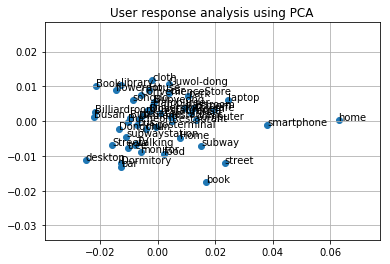

In [90]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.title('User response analysis using PCA')
pyplot.scatter(result[:, 0], result[:,1 ])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.grid(True)
pyplot.show()